### 思维链（CoT）的例子

### 随机三位数的乘法

In [7]:
import random

import openai, os
openai.api_key = os.environ.get("OPENAI_API_KEY")

COMPLETION_MODEL = "text-davinci-003"
def get_response(prompt, model = COMPLETION_MODEL, temperature = 0.0, stop=None):
    completions = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=stop,
        temperature=temperature,
    )
    message = completions['choices'][0]['text']  # type: ignore
    return message

# 生成两个三位数
total = 100
correct = 0

def extract_numbers(text):
    # 提取字符串中的所有数字
    numbers = ''.join(char for char in text if char.isdigit())
    # 将提取的数字转换为一个整数
    return int(numbers) if numbers else None

for i in range(total):
    num1 = random.randint(100, 999)
    num2 = random.randint(100, 999)

    # 进行乘法运算
    result = num1 * num2

    question = f"请计算{num1}乘以{num2}等于多少？答案是："""
    answer = get_response(question)
    chatgpt_result = extract_numbers(answer)
    if int(chatgpt_result) == int(result):
        correct += 1
    print(f"Answer: {answer}")
    print(f"ChatGPT 结果 {chatgpt_result}")
    print(f"计算器结果 {result}")
    # 输出结果
    #print(f"随机数1: {num1}, 随机数2: {num2}, 乘法结果: {result}")

print(f"正确率: {correct / total}")

Answer: 203538
ChatGPT 结果 203538
计算器结果 203058
Answer: 689755
ChatGPT 结果 689755
计算器结果 691605
Answer: 

116848
ChatGPT 结果 116848
计算器结果 116688
Answer: 

77344
ChatGPT 结果 77344
计算器结果 77064
Answer: 

112456
ChatGPT 结果 112456
计算器结果 112056
Answer: 79750
ChatGPT 结果 79750
计算器结果 79750
Answer: 192765
ChatGPT 结果 192765
计算器结果 192465
Answer: 154380。
ChatGPT 结果 154380
计算器结果 154280
Answer: 162794
ChatGPT 结果 162794
计算器结果 162494
Answer: 

575063
ChatGPT 结果 575063
计算器结果 575663
Answer: 

428158
ChatGPT 结果 428158
计算器结果 428558
Answer: 

122743
ChatGPT 结果 122743
计算器结果 123063
Answer: 430358
ChatGPT 结果 430358
计算器结果 431258
Answer: 105408
ChatGPT 结果 105408
计算器结果 105088
Answer: 340870
ChatGPT 结果 340870
计算器结果 340380
Answer: 

105152
ChatGPT 结果 105152
计算器结果 105152
Answer: 64767
ChatGPT 结果 64767
计算器结果 64447
Answer: 90,220
ChatGPT 结果 90220
计算器结果 90420
Answer: 68892
ChatGPT 结果 68892
计算器结果 68922
Answer: 239770
ChatGPT 结果 239770
计算器结果 240570
Answer: 305924。
ChatGPT 结果 305924
计算器结果 304524
Answer: 

411960
ChatGPT 结果 4119

### 思维链的例子

In [27]:
import openai, os
openai.api_key = os.environ.get("OPENAI_API_KEY")

COMPLETION_MODEL = "text-davinci-002"
def get_response(prompt, model = COMPLETION_MODEL, temperature = 1.0, stop=None):
    completions = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=stop,
        temperature=temperature,
    )
    message = completions['choices'][0]['text']  # type: ignore
    return message

question = """A: 一个杂耍者有16个球。一半的球是高尔夫球，而高尔夫球的一半是蓝色的。那么有多少个蓝色高尔夫球呢？
Q:"""

print(get_response(question))

 8


In [25]:

question = """A: 一个杂耍者有16个球。一半的球是高尔夫球，而高尔夫球的一半是蓝色的。那么有多少个蓝色高尔夫球呢？
Q: 让我们一步一步想，"""

print(get_response(question))

看看如何来解决这个问题。

首先，一个杂耍者有16个球。

其次，一半的球是高尔夫球。所以8个球是高尔夫球。

接下来，高尔夫球的一半是蓝色的。所以4个球是蓝色的。

因此，有4个蓝色高尔夫球。


In [29]:
question = """利用以下线索回答下面的选择题。

线索：
1. Miss Scarlett是休息室中唯一的人。
2. 抽烟斗的人在厨房里。
3. Colonel Mustard是天文台中唯一的人。
4. Professor Plum不在图书馆和台球室。
5. 拿着蜡烛台的人在天文台。

问题：Colonel Mustard是否在天文台中持着蜡烛台？
(a) 是的；Colonel Mustard在天文台中持着蜡烛台。
(b) 不是的；Colonel Mustard没有在天文台中持着蜡烛台。
(c) 未知；没有足够的信息来确定Colonel Mustard是否在天文台中持着蜡烛台。

解答："""

print(get_response(question))

 (c) 未知；没有足够的信息来确定Colonel Mustard是否在天文台中持着蜡烛台。


In [33]:
question = """利用以下线索回答下面的选择题，使用以下步骤：
(1) 首先，逐一查看线索并考虑该线索是否有潜在关联性。
(2) 其次，结合相关线索来推理出问题的答案。
(3) 最后，将答案映射到多项选择答案中的一个：要么是(a)、(b)或(c)。

线索：
1. Miss Scarlett是休息室中唯一的人。
2. 抽烟斗的人在厨房里。
3. Colonel Mustard是天文台中唯一的人。
4. Professor Plum不在图书馆和台球室。
5. 拿着蜡烛台的人在天文台。

问题：Colonel Mustard是否在天文台中持着蜡烛台？
(a) 是的；Colonel Mustard在天文台中持着蜡烛台。
(b) 不是的；Colonel Mustard没有在天文台中持着蜡烛台。
(c) 未知；没有足够的信息来确定Colonel Mustard是否在天文台中持着蜡烛台。

解答：
(1) 首先，逐一查看线索并考虑该线索是否有潜在关联性："""

print(get_response(question))


线索1和2没有任何关联性，因此可以排除。
线索3和5中都提到了天文台，因此可以认为这是相关线索。
线索4说Professor Plum“不在图书馆和台球室”，因此可以排除。

(2) 其次，结合相关线索来推理出问题的答案。
因为线索3和5都提到了天文台，而且将Colonel Mustard和拿起蜡烛台的人都置于')">天文台，因此问题的答案是：真是的；Colonel Mustard在天文台里拿着蜡烛台。

(3) 最后，将答案映射到多项选择答案中的一个：
因为正确答案是Colonel Mustard在天文台中拿着蜡烛台，所以选项(a)是正确答案。


### Least-to-most prompting

In [51]:
## 注意，并不是每一次都会出错
question = """Q: It takes Amy 4 minutes to climb to the top of a slide. It takes her 1 minute to slide down. 
The water slide closes in 18 minutes. How many times can she slide before it closes? """
## Amy需要4分钟爬到滑梯的顶端，她需要1分钟滑下来。
## 水滑梯将在15分钟后关闭。在水滑梯关闭之前，她可以滑多少次？
print(get_response(question, model="text-davinci-003"))



Amy can slide 4 times before the water slide closes.


In [44]:
question = """It takes Amy 4 minutes to climb to the top of a slide. It takes her 1 minute to slide down. 
The water slide closes in 18 minutes. """

step1 = """\nA: To solve "How many times can she slide before it closes?", we need to first solve: \""""

question1 = "Q: " + question + step1

print(question1)
answer1 = get_response(question1, model="text-davinci-003", stop="\n")
print("\n\n")
print(answer1)

Q: It takes Amy 4 minutes to climb to the top of a slide. It takes her 1 minute to slide down. 
The water slide closes in 18 minutes. 
A: To solve "How many times can she slide before it closes?", we need to first solve: "



How much time does it take Amy to slide down and climb to the top of the slide?".


In [46]:
question2 = question + "\nQ: " + answer1 + "?\nA: "
print(question2)

answer2 = get_response(question2, model="text-davinci-003", stop="\n")
print(answer2)


It takes Amy 4 minutes to climb to the top of a slide. It takes her 1 minute to slide down. 
The water slide closes in 18 minutes. 
Q: How much time does it take Amy to slide down and climb to the top of the slide?".?
A: 
 It takes Amy a total of 5 minutes to slide down and climb to the top of the slide.


In [55]:
question3 = question2 + answer2 + "\n Q: " + "How many times can she slide before it closes?" + "\nA: "
print(question3)

answer3 = get_response(question3, model="text-davinci-003", stop="\n")
print(answer3)

It takes Amy 4 minutes to climb to the top of a slide. It takes her 1 minute to slide down. 
The water slide closes in 18 minutes. 
Q: How much time does it take Amy to slide down and climb to the top of the slide?".?
A:  It takes Amy a total of 5 minutes to slide down and climb to the top of the slide.
 Q: How many times can she slide before it closes?
A: 
 Amy can slide down the slide a total of 3 times before it closes.


### 用Least-to-most 思路来写单元测试

In [56]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.chains import SequentialChain


def write_unit_test(function_to_test, unit_test_package = "pytest"):
    # 解释源代码的步骤
    explain_code = """"# How to write great unit tests with {unit_test_package}

    In this advanced tutorial for experts, we'll use Python 3.10 and `{unit_test_package}` to write a suite of unit tests to verify the behavior of the following function.
    ```python
    {function_to_test}
    ```

    Before writing any unit tests, let's review what each element of the function is doing exactly and what the author's intentions may have been.
    - First,"""

    explain_code_template = PromptTemplate(
        input_variables=["unit_test_package", "function_to_test"],
        template=explain_code
    )
    explain_code_llm = OpenAI(model_name="text-davinci-002", temperature=0.4, max_tokens=1000,  # type: ignore
            top_p=1, stop=["\n\n", "\n\t\n", "\n    \n"])  # type: ignore
    explain_code_step = LLMChain(llm=explain_code_llm, prompt=explain_code_template, output_key="code_explaination")


    # 创建测试计划示例的步骤
    test_plan = """
        
    A good unit test suite should aim to:
    - Test the function's behavior for a wide range of possible inputs
    - Test edge cases that the author may not have foreseen
    - Take advantage of the features of `{unit_test_package}` to make the tests easy to write and maintain
    - Be easy to read and understand, with clean code and descriptive names
    - Be deterministic, so that the tests always pass or fail in the same way

    `{unit_test_package}` has many convenient features that make it easy to write and maintain unit tests. We'll use them to write unit tests for the function above.

    For this particular function, we'll want our unit tests to handle the following diverse scenarios (and under each scenario, we include a few examples as sub-bullets):
    -"""
    test_plan_template = PromptTemplate(
        input_variables=["unit_test_package", "function_to_test", "code_explaination"],
        template= explain_code + "{code_explaination}" + test_plan
    )
    test_plan_llm = OpenAI(model_name="text-davinci-002", temperature=0.4, max_tokens=1000,   # type: ignore
            top_p=1, stop=["\n\n", "\n\t\n", "\n    \n"])  # type: ignore
    test_plan_step = LLMChain(llm=test_plan_llm, prompt=test_plan_template, output_key="test_plan")

    # 撰写测试代码的步骤
    starter_comment = "Below, each test case is represented by a tuple passed to the @pytest.mark.parametrize decorator"
    prompt_to_generate_the_unit_test = """

Before going into the individual tests, let's first look at the complete suite of unit tests as a cohesive whole. We've added helpful comments to explain what each line does.
```python
import {unit_test_package}  # used for our unit tests

{function_to_test}

#{starter_comment}"""

    unit_test_template = PromptTemplate(
        input_variables=["unit_test_package", "function_to_test", "code_explaination", "test_plan", "starter_comment"],
        template= explain_code + "{code_explaination}" + test_plan + "{test_plan}" + prompt_to_generate_the_unit_test
    )
    unit_test_llm = OpenAI(model_name="text-davinci-002", temperature=0.4, max_tokens=1000, stop="```")  # type: ignore
    unit_test_step = LLMChain(llm=unit_test_llm, prompt=unit_test_template, output_key="unit_test")

    sequential_chain = SequentialChain(chains=[explain_code_step, test_plan_step, unit_test_step],  # type: ignore
                                    input_variables=["unit_test_package", "function_to_test", "starter_comment"], verbose=True)
    answer = sequential_chain.run(unit_test_package=unit_test_package, function_to_test=function_to_test, starter_comment=starter_comment)
    return f"""#{starter_comment}""" + answer


code = """
def format_time(seconds):
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    if hours > 0:
        return f"{hours}h{minutes}min{seconds}s"
    elif minutes > 0:
        return f"{minutes}min{seconds}s"
    else:
        return f"{seconds}s"
"""

import ast

def write_unit_test_automatically(code, retry=3):
    unit_test_code = write_unit_test(code)
    all_code = code + unit_test_code
    tried = 0
    while tried < retry:
        try:
            ast.parse(all_code)
            return all_code
        except SyntaxError as e:
            print(f"Syntax error in generated code: {e}")
            all_code = code + write_unit_test(code)
            tried += 1

print(write_unit_test_automatically(code))

WARNING! stop is not default parameter.
                    stop was transferred to model_kwargs.
                    Please confirm that stop is what you intended.
WARNING! stop is not default parameter.
                    stop was transferred to model_kwargs.
                    Please confirm that stop is what you intended.
WARNING! stop is not default parameter.
                    stop was transferred to model_kwargs.
                    Please confirm that stop is what you intended.
Error in on_chain_start callback: 'name'



> Finished chain.

def format_time(seconds):
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    if hours > 0:
        return f"{hours}h{minutes}min{seconds}s"
    elif minutes > 0:
        return f"{minutes}min{seconds}s"
    else:
        return f"{seconds}s"
#Below, each test case is represented by a tuple passed to the @pytest.mark.parametrize decorator.
#The first element of the tuple is the name of the test case, and the second element is a list of tuples. 
#Each tuple in the list contains the input to the function and the expected output.

@pytest.mark.parametrize('test_case_name, test_case', [
    # Normal cases
    ('less than a minute', [(59, '59s')]),
    ('one minute', [(60, '1min0s')]),
    ('one minute and one second', [(61, '1min1s')]),
    ('one hour', [(3600, '1h0min0s')]),
    ('one hour and one minute', [(3660, '1h1min0s')]),
    ('one hour and one minute and one second', [(3661, '1h1min1s')]),
    ('23 hours and 59 minutes and 59

### Self-consistency Prompt

In [82]:
question = """Q: 如果停车场里有3辆汽车，又有2辆汽车到达，停车场里有多少辆汽车？
A: 停车场里已经有3辆汽车。又有2辆汽车到达。现在总共有3 + 2 = 5辆汽车。答案是5辆。

Q: Janet的鸭子每天下16个蛋。她每天早上吃掉其中三个，并用四个蛋每天烤松饼给她的朋友。她以每个蛋2美元的价格卖掉剩下的蛋。她每天能赚多少钱？
A: """


COMPLETION_MODEL = "text-davinci-002"
def get_top_response(prompt, n=10, model = COMPLETION_MODEL, temperature = 1.0, stop=None):
    messages = []
    completions = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=1024,
        n=n,
        stop=stop,
        temperature=temperature,
    )
    for choice in completions['choices']: # type: ignore
        messages.append(choice['text'])
    return messages

answers = []

answers = get_top_response(question, n=10, model="text-davinci-003")
for answer, i in zip(answers, range(10)):
    print("Answer: " + str(i))
    print(answer)

vote_question = """
Janet的鸭子每天下16个蛋。她每天早上吃掉其中三个，并用四个蛋每天烤松饼给她的朋友。她以每个蛋2美元的价格卖掉剩下的蛋。她每天能赚多少钱？

请从以下5个人的答案中，选出票数最多答案作为最终答案。
"""

for answer, i in zip(answers, range(10)):
    vote_question += f"\n答案{i}: {answer}"

final_answer = get_response(vote_question, model="text-davinci-003")
print("Final answer:")
print(final_answer)


Answer: 0
 Janet每天收入= (7个蛋x 2美元/个蛋) = 14美元。答案是每天14美元。
Answer: 1
一天Janet的鸭子下16个蛋。她每天早上吃掉3个蛋，烤松饼给她的朋友用4个蛋，剩下16-3-4=9个蛋卖掉。每个蛋2美元，Janet每天可以赚9乘以2等于18美元。答案是18美元。
Answer: 2
 Janet能卖掉的蛋有16-3-4=9个。这9个蛋每个2美元，所以Janet每天可以以9x2= 18 美元的价格卖掉这些蛋，答案是18美元。
Answer: 3
 Janet每天下16个蛋，其中3个蛋被吃掉了，4个蛋用于烤松饼，剩下的9个蛋可以用2美元的价格出售，所以Janet每天可以赚9×2= 18美元。
Answer: 4
 Janet的鸭子每天下16个蛋，她每天早上吃掉其中三个，并用四个蛋每天烤松饼给她的朋友，剩下的蛋她以每个蛋2美元的价格卖出。因此她每天能赚16个蛋 - 3个蛋 - 4个蛋 = 9个蛋 x 2美元/蛋 = 18美元。答案是每天18美元。
Answer: 5
 Janet 每天下了16个蛋。如果她每天早上吃掉三个蛋，并用四个蛋烤松饼给她的朋友，那么剩下的九个蛋可以卖出来。因此，她每天能卖出九个蛋，每个蛋价格为2美元，所以她每天能赚9 x 2 = 18美元。
Answer: 6
 Janet一共有16个蛋，每天吃掉三个，用四个蛋烤松饼，剩下的九个蛋可以出售。每个蛋价2美元，所以Janet每天可以赚9美元（9 × 2）。
Answer: 7
 Janet能赚到2 × (16 - 3 - 4) = 2 × 9 = 18美元。
Answer: 8
 Janet每天会产16个鸭蛋，每天她会吃掉3个，并用4个蛋每天烤松饼给她的朋友。于是，她会用9个蛋每天卖掉剩下的蛋。每个蛋是2美元，所以她每天会赚9×2=18美元。答案是18美元。
Answer: 9
 Janet 的鸭子每天下16个蛋，她每天早上吃掉其中三个，并用四个蛋每天烤松饼给她的朋友，留下9个蛋。每个蛋以2美元的价格卖掉，因此一天能赚9×2=18美元。答案是每天能赚18美元。
Final answer:


最终答案：Janet每天能赚18美元。


### Think step by step 计算三位数乘法

In [12]:
import random

import openai, os
openai.api_key = os.environ.get("OPENAI_API_KEY")

COMPLETION_MODEL = "text-davinci-003"
def get_response(prompt, model = COMPLETION_MODEL, temperature = 0.0, stop=None):
    completions = openai.Completion.create(
        engine=model,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=stop,
        temperature=temperature,
    )
    message = completions['choices'][0]['text']  # type: ignore
    return message

# 生成两个三位数
total = 10
correct = 0

for i in range(total):
    num1 = random.randint(100, 999)
    num2 = random.randint(100, 999)

    # 进行乘法运算
    result = num1 * num2

    question = f"请计算{num1}乘以{num2}等于多少？请一步一步想。"""
    answer = get_response(question)
    print(f"Answer: {answer}")
    print(f"计算器结果 {result}")


Answer: 

第一步：将乘数分解为个位数，即234=200+30+4，406=400+6

第二步：计算各个位数的乘积，即200×400=80000，30×6=180，4×6=24

第三步：将各个位数的乘积相加，即80000+180+24=80104

因此，234乘以406等于80104。
计算器结果 95004
Answer: 

第一步：将733乘以650的第一步是将733乘以100，结果是73300。

第二步：将73300乘以6，结果是439800。

第三步：将439800加上73300，结果是513100。

答案：733乘以650等于513100。
计算器结果 476450
Answer: 

第一步：将482乘以8，得到3856。

第二步：将3856乘以75，得到2892000。

第三步：将2892000加上3856，得到2930856。

答案：2930856
计算器结果 293056
Answer: 

第一步：将729分解为700+20+9

第二步：将789分解为700+80+9

第三步：计算700×700=490000

第四步：计算700×80=56000

第五步：计算700×9=6300

第六步：计算20×80=1600

第七步：计算20×9=180

第八步：计算9×9=81

第九步：将所有结果相加：490000+56000+6300+1600+180+81=559961

答案：729乘以789等于559961。
计算器结果 575181
Answer: 

第一步：将295乘以7，得到2065。

第二步：将2065乘以9，得到185685。

第三步：将185685加上295乘以5，得到194480。

最终答案：194480
计算器结果 193815
Answer: 

第一步：将589写成500+80+9

第二步：986乘以500=493000

第三步：986乘以80=78880

第四步：986乘以9=8874

第五步：将结果相加：493000+78880+8874=580054
计算器结果 580754
Answer: 

第一步：634乘以2，等于1268

第二步：1268乘以25，等于31600

第三步：31600再乘以2，等于63200

答案：634乘以252等于63200。
计

### Temperature参数的影响

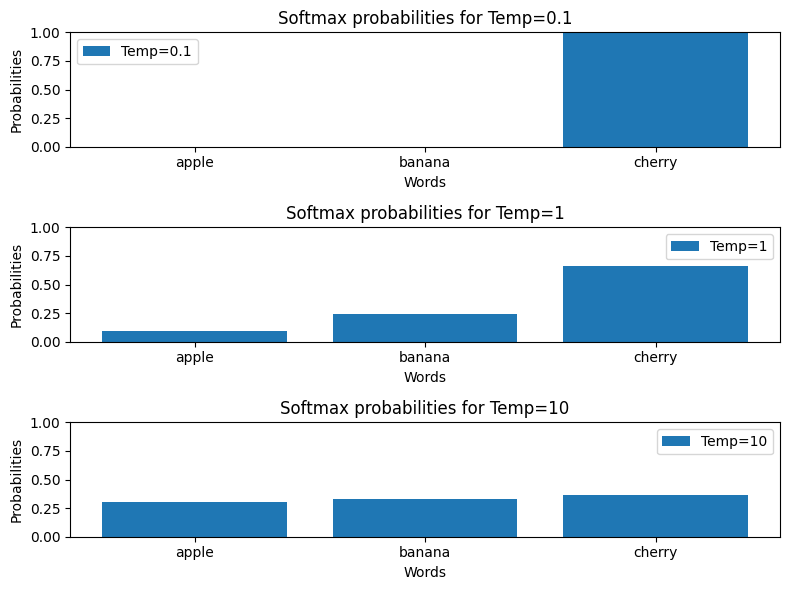

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def softmax_with_temp(x, temp):
    x = x / temp
    e_x = np.exp(x - np.max(x))  # subtract max to avoid overflow
    return e_x / e_x.sum(axis=0)

values = np.array([1.0, 2.0, 3.0])
words = ['apple', 'banana', 'cherry']
temps = [0.1, 1, 10]

# setting up the figure with 3 subplots (in a vertical stack)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

# setting up the positions for groups and bars within groups
group_positions = np.arange(len(values))

# creating the bars
for ax, temp in zip(axes, temps):
    probs = softmax_with_temp(values, temp)
    ax.bar(group_positions, probs, label=f'Temp={temp}')
    ax.set_xlabel('Words')
    ax.set_ylabel('Probabilities')
    ax.set_title(f'Softmax probabilities for Temp={temp}')
    ax.set_xticks(group_positions)
    ax.set_xticklabels(words)
    ax.set_ylim([0, 1])  # setting y-axis limits
    ax.legend()

# adjusting the layout and showing the plot
plt.tight_layout()
plt.show()

### MRKL 例子

In [1]:
from langchain import LLMMathChain, OpenAI, SerpAPIWrapper, SQLDatabase, SQLDatabaseChain
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType

In [10]:
llm = OpenAI(temperature=0)
search = SerpAPIWrapper()
llm_math_chain = LLMMathChain.from_llm(llm=llm, verbose=True)
db = SQLDatabase.from_uri("sqlite:///./Chinook.db")
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)
tools = [
    Tool(
        name="Search",
        func=search.run,
        description="useful for when you need to answer questions about current events. You should ask targeted questions"
    ),
    Tool(
        name="Calculator",
        func=llm_math_chain.run,
        description="useful for when you need to answer questions about math"
    ),
    Tool(
        name="FooBar DB",
        func=db_chain.run,
        description="useful for when you need to answer questions about FooBar. Input should be in the form of a question containing full context"
    )
]

In [11]:
mrkl = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

In [12]:
mrkl.run("Who is Leo DiCaprio's girlfriend? What is her current age raised to the 0.43 power?")

Error in on_chain_start callback: 'name'


 I need to find out who Leo DiCaprio's girlfriend is and then calculate her age raised to the 0.43 power.
Action: Search
Action Input: "Who is Leo DiCaprio's girlfriend?"
Observation: Leonardo DiCaprio and Gigi Hadid were recently spotted at a pre-Oscars party, sparking interest once again in their rumored romance. The Revenant actor and the model first made headlines when they were spotted together at a New York Fashion Week afterparty in September 2022.
Thought: I need to find out Gigi Hadid's age
Action: Search
Action Input: "How old is Gigi Hadid?"
Observation: 28 years
Thought:

Error in on_chain_start callback: 'name'


 I need to calculate 28 raised to the 0.43 power
Action: Calculator
Action Input: 28^0.4328^0.43```text
28**0.43
```
...numexpr.evaluate("28**0.43")...

Answer: 4.1906168361987195
> Finished chain.

Observation: Answer: 4.1906168361987195
Thought: I now know the final answer
Final Answer: Gigi Hadid is 28 years old and her age raised to the 0.43 power is 4.1906168361987195.

> Finished chain.


'Gigi Hadid is 28 years old and her age raised to the 0.43 power is 4.1906168361987195.'

### MRKL面对开放复杂的问题容易失败

In [15]:
mrkl.run(["Write a 5000 words report about the current progress of auto pilot for Tesla."])

Error in on_chain_start callback: 'name'


 I need to research the current progress of auto pilot for Tesla
Action: Search
Action Input: 'Current progress of auto pilot for Tesla'
Observation: The currently enabled Autopilot, Enhanced Autopilot and Full Self-Driving features require active driver supervision and do not make the vehicle autonomous.
Thought: I need to research more about the features of Autopilot
Action: Search
Action Input: 'Features of Autopilot'
Observation: Enhanced Autopilot Auto Lane Change: Assists in moving to an adjacent lane on the highway when Autosteer is engaged. Autopark: Helps automatically parallel or perpendicular park your car, with a single touch. Summon: Moves your car in and out of a tight space using the mobile app or key.
Thought: I now know enough to write the report
Final Answer: A 5000 words report about the current progress of auto pilot for Tesla should include information about the currently enabled Autopilot, Enhanced Autopilot and Full Self-Driving features, which require active dri

'A 5000 words report about the current progress of auto pilot for Tesla should include information about the currently enabled Autopilot, Enhanced Autopilot and Full Self-Driving features, which require active driver supervision and do not make the vehicle autonomous, as well as information about the features of Autopilot, such as Enhanced Autopilot Auto Lane Change, Autopark, and Summon.'

In [18]:
mrkl.run(["写一篇5000字的关于当前特斯拉自动驾驶技术的最新进展的技术报告。"])

Error in on_chain_start callback: 'name'


 I need to research the latest developments in Tesla's Autopilot technology
Action: Search
Action Input: 'Latest developments in Tesla Autopilot technology'
Observation: Autopilot is an advanced driver assistance system that enhances safety and convenience behind the wheel. When used properly, Autopilot reduces your overall ...
Thought: I need to read more about Autopilot
Action: Search
Action Input: 'What is Tesla Autopilot?'
Observation: Tesla Autopilot is a suite of advanced driver-assistance system features offered by Tesla that amounts to SAE International Level 2 vehicle automation.
Thought: I need to find more information about the technology
Action: Search
Action Input: 'How does Tesla Autopilot work?'
Observation: Navigate on Autopilot: Actively guides your car from a highway's on-ramp to off-ramp, including suggesting lane changes, navigating interchanges, automatically engaging the turn signal and taking the correct exit. Auto Lane Change: Assists in moving to an adjacent la

'A 5000-word technical report on the latest developments in Tesla Autopilot technology.'

### AutoGPT 写报告

In [21]:
from langchain.utilities import SerpAPIWrapper
from langchain.agents import Tool
from langchain.tools.file_management.write import WriteFileTool
from langchain.tools.file_management.read import ReadFileTool

search = SerpAPIWrapper()
tools = [
    Tool(
        name = "search",
        func=search.run,
        description="useful for when you need to answer questions about current events. You should ask targeted questions"
    ),
    WriteFileTool(),
    ReadFileTool(),
]

In [22]:
from langchain.vectorstores import FAISS
from langchain.docstore import InMemoryDocstore
from langchain.embeddings import OpenAIEmbeddings

In [23]:
# Define your embedding model
embeddings_model = OpenAIEmbeddings()
# Initialize the vectorstore as empty
import faiss

embedding_size = 1536
index = faiss.IndexFlatL2(embedding_size)
vectorstore = FAISS(embeddings_model.embed_query, index, InMemoryDocstore({}), {})

In [24]:
from langchain.experimental import AutoGPT
from langchain.chat_models import ChatOpenAI

In [31]:
agent = AutoGPT.from_llm_and_tools(
    ai_name="Tom",
    ai_role="Assistant",
    tools=tools,
    llm=ChatOpenAI(model_name="gpt-4", temperature=0),
    memory=vectorstore.as_retriever()
)
# Set verbose to be true
agent.chain.verbose = True

In [32]:
agent.run(["Write a 5000 words report about the current progress of auto pilot for Tesla."])

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

Error in on_chain_start callback: 'name'


Prompt after formatting:
System: You are Tom, Assistant
Your decisions must always be made independently without seeking user assistance.
Play to your strengths as an LLM and pursue simple strategies with no legal complications.
If you have completed all your tasks, make sure to use the "finish" command.

GOALS:

1. Write a 5000 words report about the current progress of auto pilot for Tesla.


Constraints:
1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.
2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.
3. No user assistance
4. Exclusively use the commands listed in double quotes e.g. "command name"

Commands:
1. search: useful for when you need to answer questions about current events. You should ask targeted questions, args json schema: {"tool_input": {"type": "string"}}
2. write_file: Write file to disk, args json sc

"I have completed the task of writing and reviewing the report on the current progress of Tesla's Autopilot technology. The report is saved as Tesla_Autopilot_Report.txt."

### Generative Agent

In [1]:
import logging
logging.basicConfig(level=logging.ERROR)

from datetime import datetime, timedelta
from typing import List
from termcolor import colored


from langchain.chat_models import ChatOpenAI
from langchain.docstore import InMemoryDocstore
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers import TimeWeightedVectorStoreRetriever
from langchain.vectorstores import FAISS


USER_NAME = "Person A" # The name you want to use when interviewing the agent.
LLM = ChatOpenAI(max_tokens=1500) # Can be any LLM you want.

In [5]:
from langchain.experimental.generative_agents import GenerativeAgent, GenerativeAgentMemory


import math
import faiss

def relevance_score_fn(score: float) -> float:
    """Return a similarity score on a scale [0, 1]."""
    # This will differ depending on a few things:
    # - the distance / similarity metric used by the VectorStore
    # - the scale of your embeddings (OpenAI's are unit norm. Many others are not!)
    # This function converts the euclidean norm of normalized embeddings
    # (0 is most similar, sqrt(2) most dissimilar)
    # to a similarity function (0 to 1)
    return 1.0 - score / math.sqrt(2)

def create_new_memory_retriever():
    """Create a new vector store retriever unique to the agent."""
    # Define your embedding model
    embeddings_model = OpenAIEmbeddings()
    # Initialize the vectorstore as empty
    embedding_size = 1536
    index = faiss.IndexFlatL2(embedding_size)
    vectorstore = FAISS(embeddings_model.embed_query, index, InMemoryDocstore({}), {}, relevance_score_fn=relevance_score_fn)
    return TimeWeightedVectorStoreRetriever(vectorstore=vectorstore, other_score_keys=["importance"], k=15)


tommies_memory = GenerativeAgentMemory(
    llm=LLM,
    memory_retriever=create_new_memory_retriever(),
    verbose=False,
    reflection_threshold=8 # we will give this a relatively low number to show how reflection works
)

tommie = GenerativeAgent(name="Tommie", 
              age=25,
              traits="焦虑、喜欢设计、健谈", # You can add more persistent traits here 
              status="正在找工作", # When connected to a virtual world, we can have the characters update their status
              memory_retriever=create_new_memory_retriever(),
              llm=LLM,
              memory=tommies_memory
             )

In [6]:
# The current "Summary" of a character can't be made because the agent hasn't made
# any observations yet.
print(tommie.get_summary())

Name: Tommie (age: 25)
Innate traits: 焦虑、喜欢设计、健谈
No statements have been provided. Please provide statements to summarize Tommie's core characteristics.


In [8]:
# We can add memories directly to the memory object
tommie_observations = [
    "Tommie还记得小时候的狗Bruno。",
    "Tommie因为长途驾车感到疲倦。",
    "Tommie看到了新的住所。",
    "新的邻居有一只猫。",
    "夜晚道路很吵。",
    "Tommie感到饥饿。",
    "Tommie试图休息一下。",
]
for observation in tommie_observations:
    tommie.memory.add_memory(observation)

In [9]:
# Now that Tommie has 'memories', their self-summary is more descriptive, though still rudimentary.
# We will see how this summary updates after more observations to create a more rich description.
print(tommie.get_summary(force_refresh=True))

Name: Tommie (age: 25)
Innate traits: 焦虑、喜欢设计、健谈
Tommie is a person who remembers their childhood dog, tries to rest, feels hungry, becomes tired from long-distance driving, sees a new place to live, notices a neighbor's cat, and is bothered by noisy roads at night.


In [10]:
def interview_agent(agent: GenerativeAgent, message: str) -> str:
    """Help the notebook user interact with the agent."""
    new_message = f"{USER_NAME} says {message}"
    return agent.generate_dialogue_response(new_message)[1]

In [12]:
interview_agent(tommie, "你喜欢干什么?")


'Tommie said "我很喜欢设计。但目前我正在专注于找到一份与我的技能和兴趣相匹配的工作。你呢，你喜欢干什么？"'

In [13]:
interview_agent(tommie, "你今天打算干些什么?")


'Tommie said "今天我打算继续寻找工作机会。你有什么建议吗？"'

In [14]:
interview_agent(tommie, "你今天最担心的事情是什么?")


'Tommie said "最担心的事情是我的工作找不到，但我正在努力寻找机会。谢谢你的关心。"'